In [9]:
from pathlib import Path
from matplotlib import pyplot as plt
import numpy as np
import scipy.io as spio
import random
import pandas as pd
import seaborn as sns
import numpy as np
import colorsys
import random

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16
plt.rcParams.update({'font.size': 16})

# plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
# plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
# plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# Get N distinguisable colors
def _get_colors(num_colors):
    colors=[]
    for i in np.arange(0., 360., 360. / num_colors):
        hue = i/360.
        lightness = (50 + np.random.rand() * 10)/100.
        saturation = (90 + np.random.rand() * 10)/100.
        colors.append(colorsys.hls_to_rgb(hue, lightness, saturation))
    return colors

In [10]:
mainpath = Path('/Users/saadjansari/Documents/Projects/ImageAnalysis/SingleCell/Results/Test_fourier3')
mainpath.resolve()
csv_names = ['exp_polyrate.csv', 'fit_polyrate.csv', 'exp_depolyrate.csv', 'fit_depolyrate.csv']

df_poly = pd.DataFrame()
df_depoly = pd.DataFrame()

df_poly['name'] = ['Hand-Measured','Automated']
df_depoly['name'] = ['Hand-Measured','Automated']

df_poly['path'] = [ mainpath / relpath for relpath in csv_names[0:2]]
df_depoly['path'] = [ mainpath / relpath for relpath in csv_names[2:]]

num_data = df_poly.shape[0]
# cols = _get_colors(num_data)

# for each file, load it
data_poly = []
data_depoly = []
for idx in np.arange(num_data):
    data_poly.append( np.genfromtxt(df_poly.path[idx], delimiter=',') )
    data_depoly.append( np.genfromtxt(df_depoly.path[idx], delimiter=',') )
df_poly['data'] = data_poly
df_depoly['data'] = data_depoly

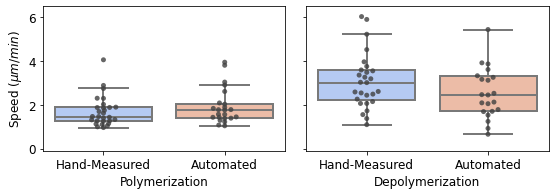

In [13]:
# Plotting
fig,ax = plt.subplots(1,2,figsize=(8,3), sharey=True)
meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"8"}

# Polymerization
sns.swarmplot(data=df_poly.data, color=".25",ax=ax[0],alpha=0.8)
sns.boxplot(data=df_poly.data, palette='coolwarm', linewidth=2, 
                 fliersize=0, ax=ax[0])
ax[0].set(
    ylabel=r'Speed ($\mu m / min$)', xlabel='Polymerization')
ax[0].set_xticklabels( df_poly.name)

# Depolymerization
sns.boxplot(data=df_depoly.data, palette='coolwarm', linewidth=2, 
                 fliersize=0,ax=ax[1])
sns.swarmplot(data=df_depoly.data, color=".25",ax=ax[1],alpha=0.8)

ax[1].set_xticklabels( df_depoly.name)
ax[1].set(
    xlabel='Depolymerization')

ax[0].set(ylim=[-0.1,6.5], yticks=[0,2,4,6])
plt.tight_layout()
plt.savefig(mainpath / 'by_rates_comparison.pdf')